In [279]:
%load_ext autoreload
%autoreload 2
import sys
import pickle
from pathlib import Path
gpu_implementation_path = '/home/mt/repos/research.mtne/gpu_implementation'
if gpu_implementation_path not in sys.path:
    sys.path.append(gpu_implementation_path)
gpu_implementation_analysis_path = '/home/mt/repos/research.mtne/gpu_implementation/analysis'
if gpu_implementation_analysis_path not in sys.path:
    sys.path.append(gpu_implementation_analysis_path)
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import utils
from metrics import *

# from esmt import TrainingState

main_log_dir = Path(gpu_implementation_path) / "logs"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [280]:
experiments = {
    'ST-zaxxon': {'dir': main_log_dir / 'ST-zaxxon-5000', 'type': 'ST'},
    'ST-riverraid': {'dir': main_log_dir / 'ST-riverraid-5000', 'type': 'ST'},
    'MT': {'dir': main_log_dir / 'MT-zaxxon-riverraid-5000', 'type': 'MT' },
    'ST-riverraid-zaxxon': {'dir': main_log_dir / 'evaluate_riverraid_using_zaxxon_model', 'type': 'ST'},
    'ST-zaxxon-riverraid': {'dir': main_log_dir / 'evaluate_zaxxon_using_riverraid_model', 'type': 'ST'},
    
}

In [281]:
for exp_name, exp in experiments.items():
    exp['cfg'] = utils.get_config(exp)
    exp['rewards'] = utils.get_rewards(exp)

/home/mt/repos/research.mtne/gpu_implementation/logs/ST-riverraid-5000
/home/mt/repos/research.mtne/gpu_implementation/logs/evaluate_riverraid_using_zaxxon_model
/home/mt/repos/research.mtne/gpu_implementation/logs/MT-zaxxon-riverraid-5000
/home/mt/repos/research.mtne/gpu_implementation/logs/evaluate_zaxxon_using_riverraid_model
/home/mt/repos/research.mtne/gpu_implementation/logs/ST-zaxxon-5000


In [297]:
# 5) DKL (offspring only) – 2 plots: one for task 0, one for task 1
# x axis: iterations (0 to 200)
# y axis: DKL for consecutive iterations (1 vs 0, 2 vs 1, 3 vs 2, ... , 200 vs 199)
# lines: (a) MTES; (b) STES [zaxxon evaluated on riverraid]; (c) STES [riverraid evaluated on zaxxon].

iterations = range(1, 200)
bin_size = 100
epsilon = 0.0001
dkl0 = pd.DataFrame.from_dict({
    'MT-zaxxon': [utils.compute_dkl(experiments['MT'], 0, i, bin_size, epsilon) for i in iterations],
    'ST-zaxxon': [utils.compute_dkl(experiments['ST-zaxxon'], 0, i, bin_size, epsilon) for i in iterations],
    'ST-riverraid-zaxxon': [utils.compute_dkl(experiments['ST-riverraid-zaxxon'], 0, i, bin_size, epsilon) for i in iterations]
})
dkl1 = pd.DataFrame.from_dict({
    'MT-riverraid': [utils.compute_dkl(experiments['MT'], 1, i, bin_size, epsilon) for i in iterations],
    'ST-riverraid': [utils.compute_dkl(experiments['ST-riverraid'], 0, i, bin_size, epsilon) for i in iterations],
    'ST-zaxxon-riverraid': [utils.compute_dkl(experiments['ST-zaxxon-riverraid'], 0, i, bin_size, epsilon) for i in iterations]
})

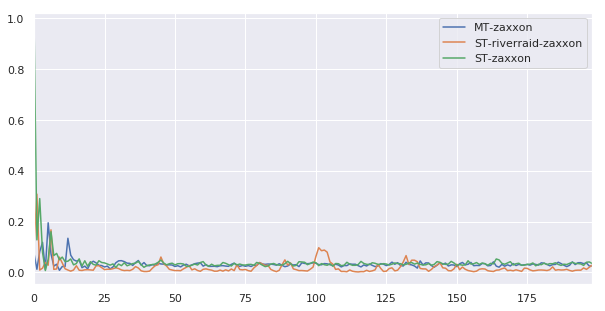

In [301]:
dkl0.plot()

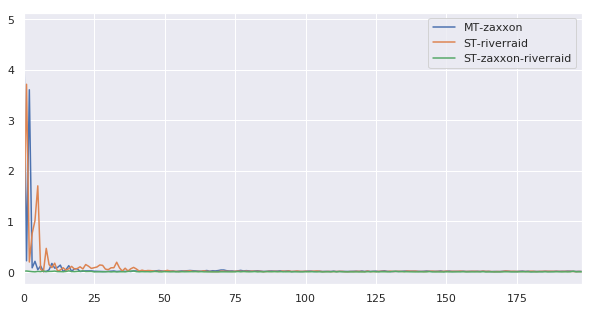

In [302]:
dkl1.plot()

In [303]:
# 6) same as 5), but y axis is “DKL for iterations (1 vs 0, 2 vs 0, 3 vs 0, ... , 200 vs 0)” (note: also in this case we need 2 plots: one for task 0, one for tasak 1)

iterations = range(1, 200)
bin_size = 100
epsilon = 0.0001
dkl_from0_0 = pd.DataFrame.from_dict({
    'MT-zaxxon': [utils.compute_dkl(experiments['MT'], 0, i, bin_size, epsilon, from_0=True) for i in iterations],
    'ST-zaxxon': [utils.compute_dkl(experiments['ST-zaxxon'], 0, i, bin_size, epsilon, from_0=True) for i in iterations],
    'ST-riverraid-zaxxon': [utils.compute_dkl(experiments['ST-riverraid-zaxxon'], 0, i, bin_size, epsilon, from_0=True) for i in iterations]
})
dkl_from0_1 = pd.DataFrame.from_dict({
    'MT-zaxxon': [utils.compute_dkl(experiments['MT'], 1, i, bin_size, epsilon, from_0=True) for i in iterations],
    'ST-riverraid': [utils.compute_dkl(experiments['ST-riverraid'], 0, i, bin_size, epsilon, from_0=True) for i in iterations],
    'ST-zaxxon-riverraid': [utils.compute_dkl(experiments['ST-zaxxon-riverraid'], 0, i, bin_size, epsilon, from_0=True) for i in iterations]
})

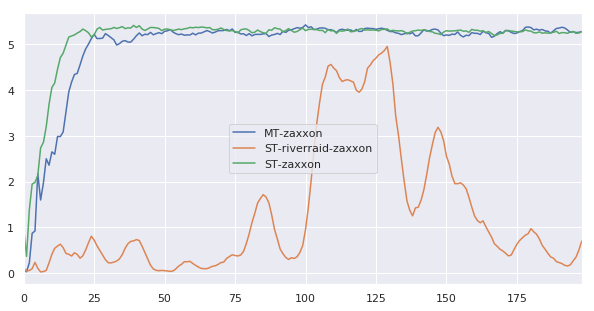

In [304]:
dkl_from0_0.plot()

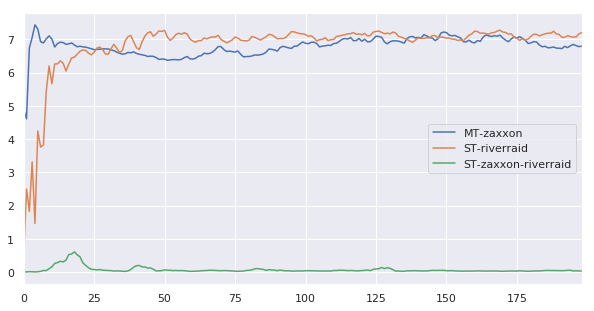

In [305]:
dkl_from0_1.plot()

In [308]:
# 7) - same as 5) but elite only
iterations = range(1, 200)
bin_size = 100
epsilon = 0.0001
dkl_elite_0 = pd.DataFrame.from_dict({
    'MT-zaxxon': [utils.compute_dkl(experiments['MT'], 0, i, bin_size, epsilon, elite_or_rewards='elite') for i in iterations],
    'ST-zaxxon': [utils.compute_dkl(experiments['ST-zaxxon'], 0, i, bin_size, epsilon, elite_or_rewards='elite') for i in iterations],
    'ST-riverraid-zaxxon': [utils.compute_dkl(experiments['ST-riverraid-zaxxon'], 0, i, bin_size, epsilon, elite_or_rewards='elite') for i in iterations]
})
dkl_elite_1 = pd.DataFrame.from_dict({
    'MT-riverraid': [utils.compute_dkl(experiments['MT'], 1, i, bin_size, epsilon, elite_or_rewards='elite') for i in iterations],
    'ST-riverraid': [utils.compute_dkl(experiments['ST-riverraid'], 0, i, bin_size, epsilon, elite_or_rewards='elite') for i in iterations],
    'ST-zaxxon-riverraid': [utils.compute_dkl(experiments['ST-zaxxon-riverraid'], 0, i, bin_size, epsilon, elite_or_rewards='elite') for i in iterations]
})

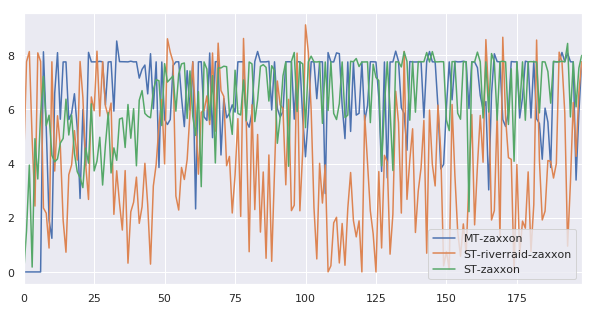

In [309]:
dkl_elite_0.plot()

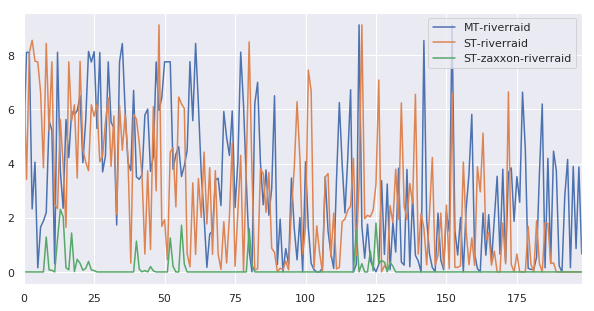

In [310]:
dkl_elite_1.plot()

In [311]:
# 8) same as 6) but elite

iterations = range(1, 200)
bin_size = 100
epsilon = 0.0001
dkl_from0_elite_0 = pd.DataFrame.from_dict({
    'MT-zaxxon': [utils.compute_dkl(experiments['MT'], 0, i, bin_size, epsilon, elite_or_rewards='elite', from_0=True) for i in iterations],
    'ST-zaxxon': [utils.compute_dkl(experiments['ST-zaxxon'], 0, i, bin_size, epsilon, elite_or_rewards='elite', from_0=True) for i in iterations],
    'ST-riverraid-zaxxon': [utils.compute_dkl(experiments['ST-riverraid-zaxxon'], 0, i, bin_size, epsilon, elite_or_rewards='elite', from_0=True) for i in iterations]
})
dkl_from0_elite_1 = pd.DataFrame.from_dict({
    'MT-zaxxon': [utils.compute_dkl(experiments['MT'], 1, i, bin_size, epsilon, elite_or_rewards='elite', from_0=True) for i in iterations],
    'ST-riverraid': [utils.compute_dkl(experiments['ST-riverraid'], 0, i, bin_size, epsilon, elite_or_rewards='elite', from_0=True) for i in iterations],
    'ST-zaxxon-riverraid': [utils.compute_dkl(experiments['ST-zaxxon-riverraid'], 0, i, bin_size, epsilon, elite_or_rewards='elite', from_0=True) for i in iterations]
})

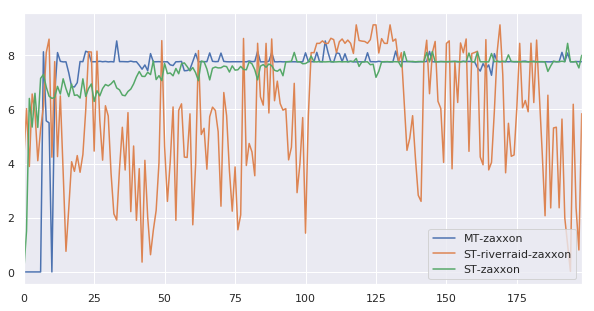

In [312]:
dkl_from0_elite_0.plot()

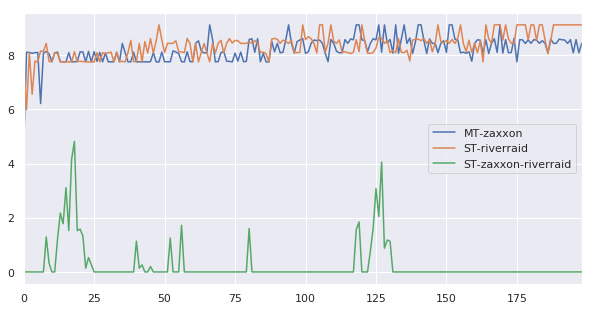

In [313]:
dkl_from0_elite_1.plot()

In [ ]:
# DISREGARD BELOW

In [285]:
cfg = experiments['ST-riverraid-zaxxon']
game_idx = 0
iterations = range(1, 200)
bin_size = 100
epsilon = 0.0001
st_riverraid_zaxxon = pd.DataFrame.from_dict({
    'dkl': [utils.compute_dkl(cfg, game_idx, i, bin_size, epsilon) for i in iterations]
})

In [286]:
cfg = experiments['ST-zaxxon']
game_idx = 0
iterations = range(1, 200)
bin_size = 100
epsilon = 0.0001
st_zaxxon = pd.DataFrame.from_dict({
    'dkl': [utils.compute_dkl(cfg, game_idx, i, bin_size, epsilon) for i in iterations]
})

In [287]:
dkl = pd.DataFrame.from_dict({
    'dkl_game0': dkl_game_idx0.dkl,
#    'dkl_game1': dkl_game_idx1.dkl,
    'dkl_st_zaxxon': st_zaxxon.dkl,
    'dkl_st_riverraid_zaxxon': st_riverraid_zaxxon.dkl
})

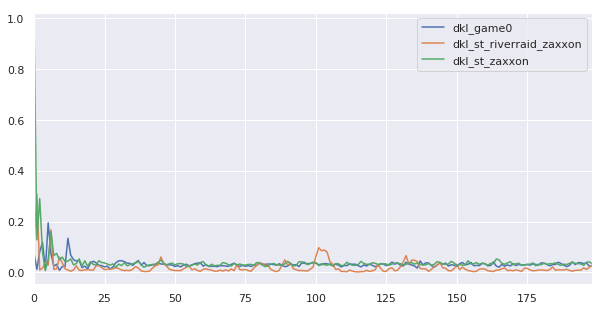

In [288]:
sns.set(rc={'figure.figsize': (10, 5)})
dkl.plot()